![logo](../img/cems_header.png)

<br>

# Observing major flood events with GLOFAS

## About

This tutorial will demonstrate how to investigate a specific flood event using data from the GLObal Flood
Awareness Service (GLOFAS). For this example we look at the flood events: **EXAMPLE_1 and EXAMPLE_2**,
and present **SOMETHING_THAT_WE_PRESENT**

The GLOFAS data is produced operationally by ECMWF for the Copernicus Emergency Management Service (CEMS).

The tutorial will first show how to download the necessary data from the C3S Climate Data Store (CDS). 
It will then describe how to **DO THE FIRT THING, then DO SOME MORE THINGS, and finally DO THE LAST THING.**

The steps and methods here serve as demonstrative examples and could be applied to other events and datasets,
e.g. fire and heatwave events.

<div>
<img src="../img/cems_glofas_global.png" width="500"/>
</div>


<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training-c3s-review/review?labpath=glofas-bangladesh-floods.ipynb">
        <img src = "https://mybinder.org/badge.svg" alt = "Binder"></th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training-c3s-review/blob/review/glofas-bangladesh-floods.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/copernicus-training-c3s-review/blob/review/glofas-bangladesh-floods.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
  </tr>
</table>

<br>

## Search, download and view data

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

### Install CDS API

To install the CDS API, run the following command. We use an exclamation mark to pass the command to the shell (not to the Python interpreter).

In [197]:
!pip -q install cdsapi

# Other requirements:
!pip -q install cfgrib ecmwflibs
!pip -q install xarray netcdf4
!pip -q install matplotlib
!pip -q install cartopy


You should consider upgrading via the '/usr/local/apps/python3/3.8.8-01/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/apps/python3/3.8.8-01/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/apps/python3/3.8.8-01/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/apps/python3/3.8.8-01/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/apps/python3/3.8.8-01/bin/python3.8 -m pip install --upgrade pip' command.


### Import libraries

We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [198]:
import os

# CDS API
import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Disable warnings for data download via API
import urllib3 
urllib3.disable_warnings()

### Enter your CDS API key

We will request data from the Climate Data Store (CDS) programmatically with the help of the CDS API. Let us make use of the option to manually set the CDS API credentials. First, you have to define two variables: `URL` and `KEY` which build together your CDS API key. The string of characters that make up your KEY include your personal User ID and CDS API key. To obtain these, first register or login to the CDS (http://cds.climate.copernicus.eu), then visit https://cds.climate.copernicus.eu/api-how-to and copy the string of characters listed after "key:". Replace the `#########` below with this string.

In [199]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '##################################'

Here we specify a data directory in which we will download our data and all output files that we will generate:

In [200]:
DATADIR = './data_dir'
os.makedirs(DATADIR, exist_ok=True)

### Search for the river discharge data we want

The historical GLOFAS data can be found in [CDS catalogue entry](https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-glofas-historical)

We are going to look at the Bangladesh flood YYYY-MM-DD

Having selected the dataset, we now need to specify what product type, variables, temporal and geographic coverage we are interested in. These can all be selected in the **"Download data"** tab. In this tab a form appears in which we will select the following parameters to download:

- Origin: `UERRA-HARMONIE`
- Variable: `10m wind speed` and `2m temperature` (these will need to be selected one at a time)
- Year: `1989 to 2018`
- Month: `January`
- Day: `15`
- Time: `06:00`
- Format: `NetCDF`

At the end of the download form, select **"Show API request"**. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook (see cells below). You will do this twice: once for 10m wind speed and again for 2m temperature.

#### Download data

... having copied the API request into the cell below, running this will retrieve and download the data you requested into your local directory. However, before you run the cell below, the **terms and conditions** of this particular dataset need to have been accepted in the CDS. The option to view and accept these conditions is given at the end of the download form, just above the **"Show API request"** option.

> **Note:** NOTE ABOUT THE DATA ACCESS?

In [201]:
download_file = f"{DATADIR}/download.grib"
if not os.path.isfile(download_file):
    c = cdsapi.Client()
    c.retrieve(
        'cems-glofas-historical',
        {
            'system_version': 'version_4_0',
            'hydrological_model': 'lisflood',
            'product_type': 'consolidated',
            'variable': 'river_discharge_in_the_last_24_hours',
            'hyear': [f"{year}" for year in range(2012, 2023)],
            'hmonth': 'june',
            'hday': [f"{day:02d}" for day in range(1,31)],
            'format': 'grib',
            'area': [30, 85, 20, 95,],
        },
    ).download(download_file)

#### Opening the data


In [202]:
glofas_data = xr.open_dataset(download_file)
glofas_data

<xarray.Dataset>
Dimensions:     (time: 330, latitude: 202, longitude: 202)
Coordinates:
  * time        (time) datetime64[ns] 2012-06-01 2012-06-02 ... 2022-06-30
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 30.02 29.97 29.92 29.87 ... 20.07 20.02 19.97
  * longitude   (longitude) float64 84.97 85.02 85.07 ... 94.92 94.97 95.02
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-06T16:37 GRIB to CDM+CF via cfgrib-0.9.9...

#### Getting an overview of the study area
Now let's plot a simple map of the data. To plot just one map, we need to reduce the time dimension. This can be done by either specifying a date (e.g. glofas_data.dis24.isel(time=1)) or by taking a value such as the mean:

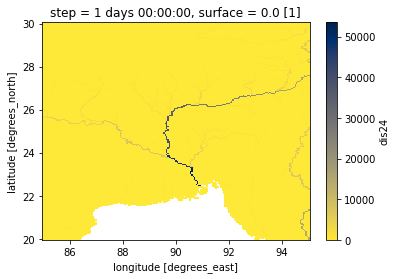

In [227]:
glofas_data.dis24.mean(dim='time').plot(cmap='cividis_r')

#### Accessing the upstream area data
The upstream area denotes the total upstream area for each river pixel, expressed in m2. It is defined as the catchment area for each river segment. For more information, see the [CEMS-Floods auxiliary data page](https://confluence.ecmwf.int/display/CEMS/Auxiliary+Data).

In [216]:
upstream_area_file = f"{DATADIR}/uparea_glofas_v4_0.nc"
u_version=2
#upstream_data_url = f"https://confluence.ecmwf.int/download/attachments/242067380/{upstream_area_file}?version={u_version}&modificationDate=1668604690076&api=v2&download=true"
#if not os.path.isfile(upstream_area_file):
#    os.system(f"wget -q {upstream_data_url}")
#    os.rename(f"{upstream_area_file}?version={u_version}", upstream_area_file)
upstream_area = xr.open_dataset(upstream_area_file)
upstream_area.uparea

<xarray.DataArray 'uparea' (latitude: 3000, longitude: 7200)>
[21600000 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * latitude   (latitude) float64 89.97 89.92 89.88 ... -59.88 -59.92 -59.97
Attributes:
    long_name:  Upstream area of each river pixel
    units:      m2
    lon:        longitude
    lat:        latitude

In [217]:
# Reduce the Upstream area data to the domain of the river discharge

# Get the latitude and longitude limits of the data
lat_limits = [glofas_data.latitude.values[i] for i in [0, -1]]
lon_limits = [glofas_data.longitude.values[i] for i in [0, -1]]
# print(lat_limits)
# print(lon_limits)
up_lats = upstream_area.latitude.values.tolist()
up_lons = upstream_area.longitude.values.tolist()

lat_slice_index = [
    round((i-up_lats[0])/(up_lats[1]-up_lats[0]))
    for i in lat_limits
]
lon_slice_index = [
    round((i-up_lons[0])/(up_lons[1]-up_lons[0]))
    for i in lon_limits
]
# print(lat_slice_index, [up_lats[i] for i in lat_slice_index])
# print(lon_slice_index, [up_lons[i] for i in lon_slice_index])

# Slice upstream area to bangladesh region:
red_upstream_area = upstream_area.isel(
    latitude=slice(lat_slice_index[0], lat_slice_index[1]+1),
    longitude=slice(lon_slice_index[0], lon_slice_index[1]+1),
)
# print('Check limits: ')
# print(lat_limits, red_upstream_area.latitude.values[[0,-1]])
# print(lon_limits, red_upstream_area.longitude.values[[0,-1]])

# There are very minor rounding differences, so we update with the lat/lons from the glofas data
red_upstream_area = red_upstream_area.assign_coords({
    'latitude': glofas_data.latitude,
    'longitude': glofas_data.longitude,
})
glofas_data['uparea'] = red_upstream_area['uparea']
glofas_data

<xarray.Dataset>
Dimensions:     (time: 330, latitude: 202, longitude: 202)
Coordinates:
  * time        (time) datetime64[ns] 2012-06-01 2012-06-02 ... 2022-06-30
    step        timedelta64[ns] 1 days
    surface     float64 0.0
  * latitude    (latitude) float64 30.02 29.97 29.92 29.87 ... 20.07 20.02 19.97
  * longitude   (longitude) float64 84.97 85.02 85.07 ... 94.92 94.97 95.02
    valid_time  (time) datetime64[ns] 2012-06-02 2012-06-03 ... 2022-07-01
Data variables:
    dis24       (time, latitude, longitude) float32 0.0 0.0 ... 3.034e+04
    uparea      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-02-06T16:37 GRIB to CDM+CF via cfgrib-0.9.9...

### Mask data

We now mask the data to where the upstream area is >= 250km2, and plot it to see how it looks

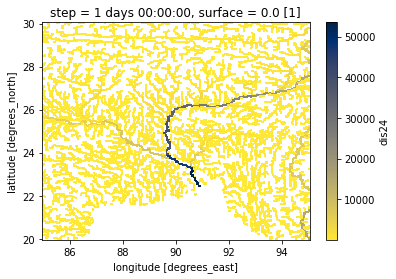

In [218]:
glofas_data_masked = glofas_data.where(glofas_data.uparea*1e-6>=250.)
glofas_data_masked.dis24.mean(dim='time').plot(x='longitude',y='latitude', cmap="cividis_r")

#### Calculating the climatology
First, let's see how severe these 2022 floods were for the area as a whole, when compared to 2012-2021 data.

In [221]:
# select the 2012-2021 data
glofas_historical_dates = glofas_data_masked.sel(time=slice("2012","2021"))

# calculate the mean discharge over the whole domain, for each day in June
glofas_xy_climatology = glofas_historical_dates.dis24.mean(["longitude", "latitude"]).groupby('time.day').mean("time")

# calculate the minimum and maximum discharge over the whole domain, for each day in June
glofas_xy_clim_min = glofas_historical_dates.dis24.mean(["longitude", "latitude"]).groupby('time.day').min("time")
glofas_xy_clim_max = glofas_historical_dates.dis24.mean(["longitude", "latitude"]).groupby('time.day').max("time")

# calculate the mean discharge over the whole domain for each day in June 2022
glofas_xy_2022 = glofas_data_masked.dis24.sel(time="2022")
glofas_xy_2022_mean = glofas_2022.mean(['longitude','latitude']).groupby('time.day').mean("time")

Now let's plot the data..

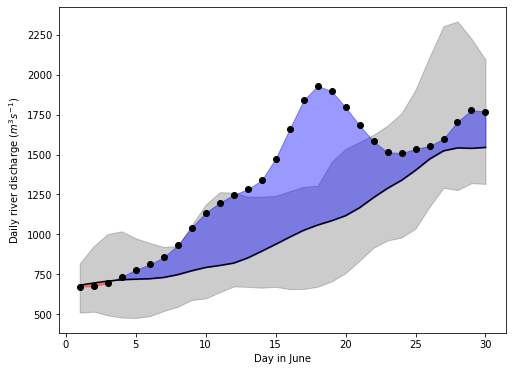

In [222]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

ax.fill_between(
    np.arange(1, 31), glofas_xy_clim_min.values, glofas_xy_clim_max.values, color="k", alpha=0.2
)

(line_base,) = plt.plot(
    np.arange(1, 31), glofas_xy_climatology.values, color="k", label="Reference period mean"
)

ax.fill_between(
    range(1, int(glofas_xy_2022_mean.shape[0]) + 1),
    glofas_xy_climatology.values[: int(glofas_xy_2022_mean.shape[0])],
    glofas_xy_2022_mean.values,
    color="b",
    alpha=0.4,
    where=glofas_xy_2022_mean.values >= glofas_xy_climatology.values[: int(glofas_xy_2022_mean.shape[0])],
    interpolate=True,
)

ax.fill_between(
    range(1, int(glofas_xy_2022_mean.shape[0]) + 1),
    glofas_xy_climatology.values[: int(glofas_xy_2022_mean.shape[0])],
    glofas_xy_2022_mean.values,
    color="r",
    alpha=0.4,
    where=glofas_xy_2022_mean.values < glofas_xy_climatology.values[: int(glofas_xy_2022_mean.shape[0])],
    interpolate=True,
)

dots = ax.scatter(
    range(1, int(glofas_xy_2022_mean.shape[0]) + 1),
    glofas_xy_2022_mean.values,
    color="k",
    label="2022",
    zorder=2,
)

plt.xlabel("Day in June")
plt.ylabel("Daily river discharge ($m^{3}s^{-1}$)")
plt.show()

From this plot, we see that around the 13th of June the 2022 floods began to exceed the 10-year historical maximum, and this continued until the 22nd.

However, this plot doesn't give us an idea of how the severity of the flooding varied spatially, so let's have a look at that.

In [223]:
# Calculate the climatology
glofas_climatology = glofas_data_masked.groupby('time.dayofyear').mean("time")
glofas_climat_quantiles = glofas_data_masked.groupby('time.dayofyear').quantile(dim="time", q=[0.1,0.5,0.9])

# Calculate the anomaly w.r.t the above climatology
glofas_anomaly = glofas_data_masked.groupby('time.dayofyear') - glofas_climatology
# Calculate this a relative anomaly
glofas_relanom = glofas_anomaly.groupby('time.dayofyear')/glofas_climatology

glofas_high = glofas_data_masked.groupby('time.dayofyear') > glofas_climat_quantiles.sel(quantile=0.9)
glofas_high = glofas_high.where(glofas_data.uparea*1e-6>250.)

/usr/local/apps/python3/3.8.8-01/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


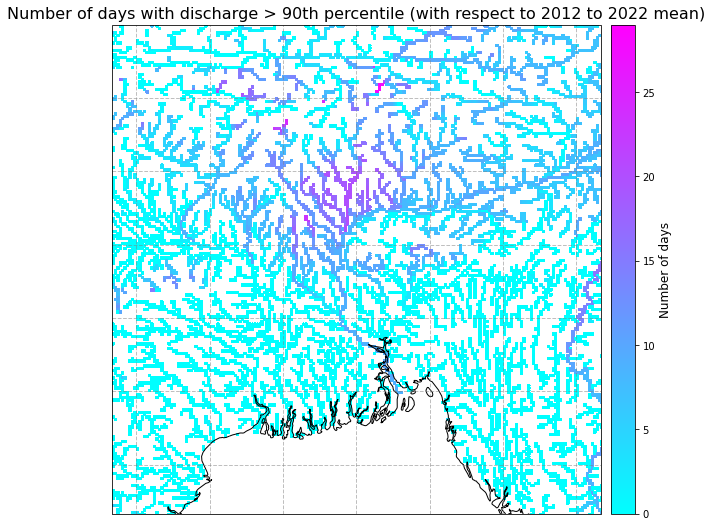

In [226]:
# Plot the data:
year = '2022'

# reduce_method = np.mean
# cmap = 'RdBu_r'
# plot_data = glofas_relanom.sel(time=year).reduce(reduce_method, dim='time')
# plot_data = glofas_climatology.reduce(reduce_method, dim='dayofyear')

cmap = 'cool'
plot_data = glofas_high.sel(time='2022').dis24.sum(dim='time')

plot_data = plot_data.where(glofas_data.uparea*1e-6>250.)

fig, ax = plt.subplots(1, 1, figsize = (18, 9), 
                       subplot_kw={'projection': ccrs.PlateCarree()})

im = plt.pcolormesh(
    plot_data.longitude, plot_data.latitude, plot_data, cmap=cmap
) 

ax.set_title(f'Number of days with discharge > 90th percentile (with respect to 2012 to 2022 mean)', fontsize=16)
ax.gridlines(draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--') 
ax.coastlines(color='black')
ax.set_extent([85, 95, 20, 30], crs=ccrs.PlateCarree())


cbar = plt.colorbar(im,fraction=0.04, pad=0.01)
cbar.set_label('Number of days', fontsize=12) 

fig.savefig(f'{DATADIR}/RiverDischarge_.png')

We can see that some areas to the northeast of Dhaka experienced discharge exceeding the 90th percentile for over 20 days in June.